## TITANIC SURVIVAL PREDICTION AND TESTING

### Predict survival on the Titanic

1. Problem statement
2. Collecting the data
3. Exploratory data analysis
4. Feature engineering
5. Modelling
6. Testing
7. Conclusion

## 1. Problem Definition:

On 15 April 1912, the unsinkable Titanic ship sank and killed 1502 passengers out of 2224. The dataset contains information like name, age, sex, number of siblings aboard, etc of about 891 passengers in the training set and 418 passengers in the testing set.
Build a fun model to predict whether a person would have survived on the Titanic or not. 

In [ ]:
from IPython.display import Image
Image(url = "https://www.historic-uk.com/wp-content/uploads/2017/04/the-sinking-of-the-rms-titanic.jpg")

## 2. Collecting the data

In [2]:
# Importing Pandas and Numpy

import pandas as pd
import numpy as np

In [3]:
# Uploading the data frame

train = pd.read_csv("/Users/Dell/Documents/Titanic/train.csv")
test = pd.read_csv("/Users/Dell/Documents/Titanic/test.csv")

## 3. Data Analysis

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### DATA DESCRIPTION
> Survived: 0 = No, 1 = Yes

> Pclass: Ticket class1 = 1st, 2 = 2nd, 3 = 3rd

> SibSp: of Siblings/Spouses aboard on Titanic

> Parch: of Parents/Children aboard on Titanic

> Ticket: Ticket Number

> Cabin: Cabin Number

> Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton


In [6]:
# Shape gives the size of row and column(row,column)

print("Row size and Column size of train dataframe: ")
train.shape

Row size and Column size of train dataframe: 


(891, 12)

In [7]:
print("Row size and Column size of test dataframe: ")
test.shape

Row size and Column size of test dataframe: 


(418, 11)

In [8]:
# info provides the information regarding datatypes, missing values, etc

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Here we are counting the missing counts from the columns of train dataframe

null_columns = train.columns[train.isnull().any()]
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# Missing counts from the test dataframe

test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### DATA VISUALISATION

As we have seen that there are few missing values and by data visualisation we can get a vague visual description about your data

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'REPRESINTING VAGUE FREQUENCY OF AGE GROUP ABOARDED')

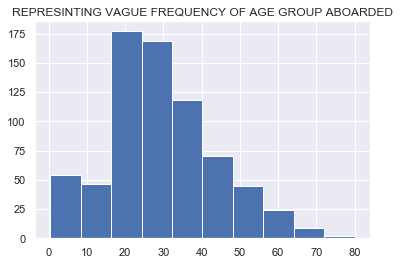

In [12]:
plt.hist(train['Age'].dropna())
plt.title("REPRESINTING VAGUE FREQUENCY OF AGE GROUP ABOARDED")


# By using dropna we remove the null value 

C:\Users\Jangale\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


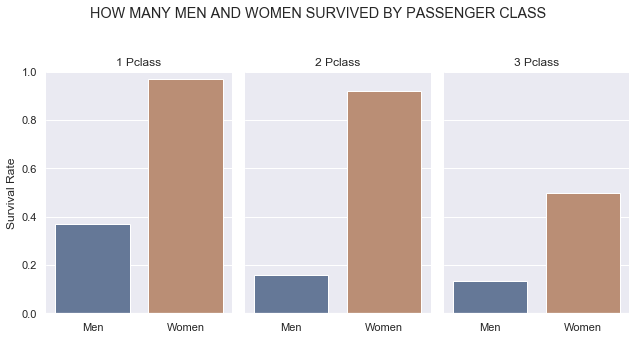

In [13]:
sns.set(font_scale = 1)
g = sns.factorplot(x = "Sex", y = "Survived", col = "Pclass", data = train, saturation=.5, kind = "bar", ci = None, 
                   aspect=.6)
(g.set_axis_labels("", "Survival Rate")
    .set_xticklabels(["Men", "Women"])
    .set_titles("{col_name} {col_var}")
    .set(ylim = (0, 1))
    .despine(left = True))  
plt.subplots_adjust(top = 0.8)
g.fig.suptitle('HOW MANY MEN AND WOMEN SURVIVED BY PASSENGER CLASS');

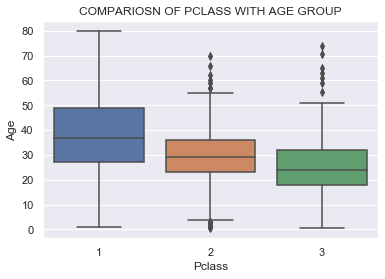

In [14]:
sns.boxplot(y = 'Age', x = 'Pclass', data = train)
plt.title("COMPARIOSN OF PCLASS WITH AGE GROUP");

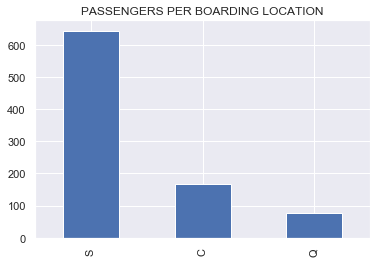

In [15]:
train.Embarked.value_counts().plot(kind = 'bar')
plt.title("PASSENGERS PER BOARDING LOCATION");

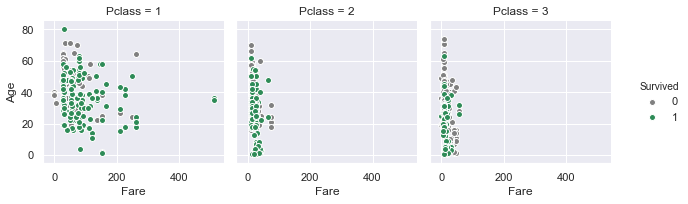

In [16]:
g = sns.FacetGrid(train, hue = "Survived", col = "Pclass", margin_titles = True, palette = {1:"seagreen", 0:"gray"})
g = g.map(plt.scatter, "Fare", "Age", edgecolor = "w").add_legend();
#plt.title("Plot of Age group survived in each class comparing the fare")

Text(0.5, 1, 'VISUALISATION OF NULL VALUES')

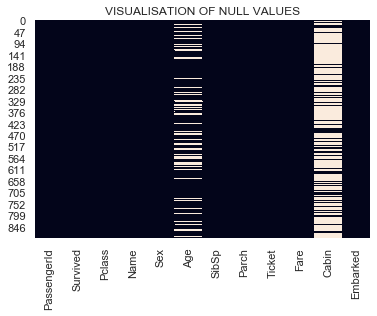

In [17]:
sns.heatmap(train.isnull(), cbar = False)
plt.title("VISUALISATION OF NULL VALUES")

## 4. Feature Engineering

Transforming  raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data. It turn our inputs into things the algorithm can understand.


In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 4.1 Name

In [20]:
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

In [21]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Mme           1
Jonkheer      1
Lady          1
Sir           1
Capt          1
Don           1
Ms            1
Countess      1
Name: Title, dtype: int64

In [22]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

### Title Map

Mr. = 0

Miss = 1

Mrs. = 2

Others = 3


In [23]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [26]:
# delete unnecessary feature from dataset

train.drop('Name', axis = 1, inplace = True)
test.drop('Name', axis = 1, inplace = True)

In [27]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [28]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


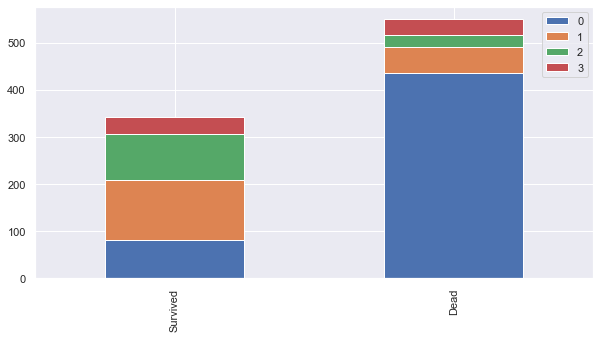

In [29]:
survived = train[train['Survived']==1]['Title'].value_counts()
dead = train[train['Survived']==0]['Title'].value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(10,5))

### 4.2 Sex

Male = 0

Female = 1


In [30]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [32]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2


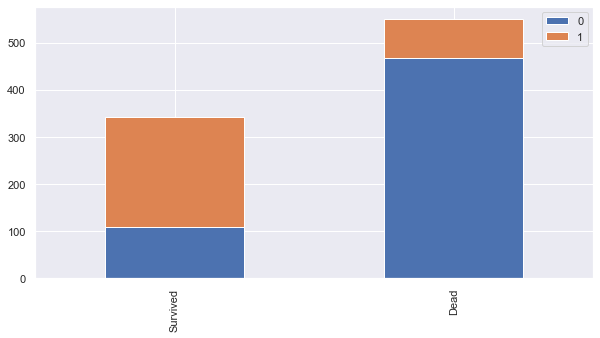

In [33]:
survived = train[train['Survived']==1]['Sex'].value_counts()
dead = train[train['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(10,5))

### 4.3 Age

Filling up the missing values by taking the median

In [34]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace = True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace = True)

In [35]:
train.head(30)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,30.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


#### 4.3.2 Converting Numerical Age to Categorical Values 

child = 0

young = 1

adult = 2

midage = 3

senior = 4

In [36]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [37]:
train.head(7)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,S,0


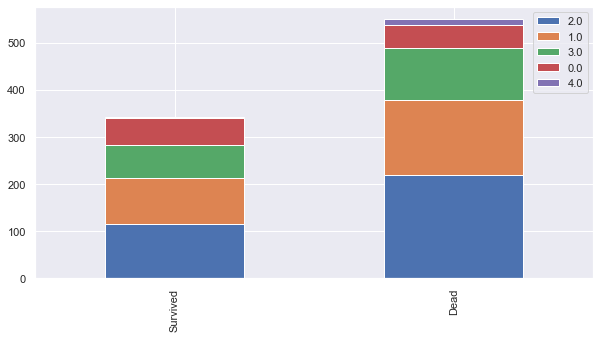

In [38]:
survived = train[train['Survived']==1]['Age'].value_counts()
dead = train[train['Survived']==0]['Age'].value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(10,5))

### 4.4 Embarked

Filling the missing values and title mapping

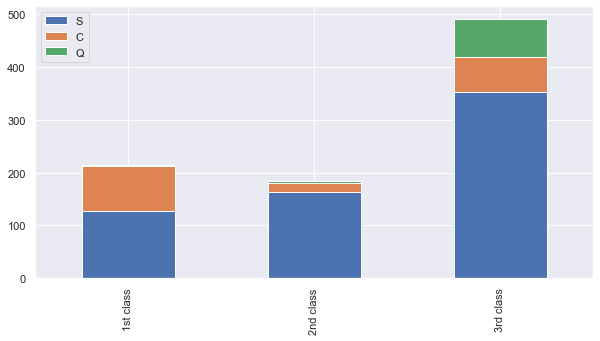

In [39]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind = 'bar',stacked = True, figsize = (10,5))

#### As more than 50% of the 1st, 2nd and 3rd class is Embarked in S we can predict that the missing values can be filled as S embarked

In [40]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [41]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [42]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


In [43]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,2,0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,0,2
2,894,2,0,3.0,0,0,240276,9.6875,NaN,2,0
3,895,3,0,2.0,0,0,315154,8.6625,NaN,0,0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,0,2


## 4.5 Fare

Filling the missing values with median Fare for Pclass

In [44]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace = True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace = True)

In [45]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [46]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


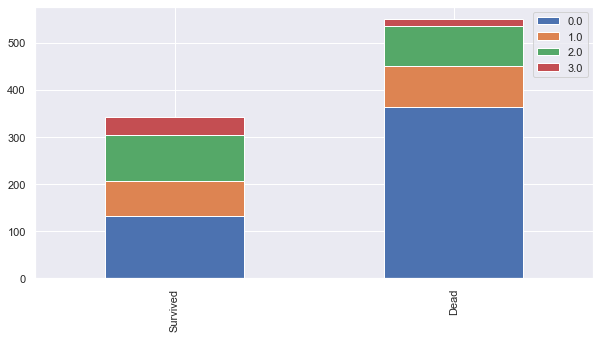

In [47]:
survived = train[train['Survived']==1]['Fare'].value_counts()
dead = train[train['Survived']==0]['Fare'].value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(10,5))

## 4.6 Cabin

In [48]:
train.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F33            3
D              3
              ..
C47            1
A5             1
B101           1
B86            1
B71            1
Name: Cabin, Length: 147, dtype: int64

In [49]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

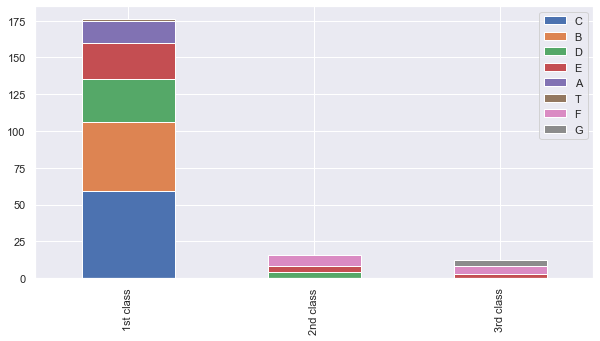

In [50]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind = 'bar',stacked = True, figsize = (10,5))

In [51]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [52]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace = True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace = True)

## 4.7 Family Size

In [53]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [54]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)


In [55]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


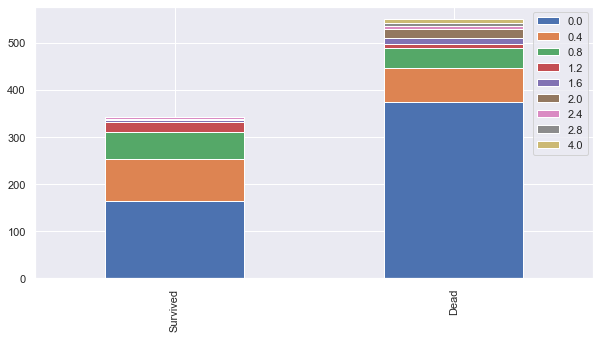

In [56]:
survived = train[train['Survived']==1]['FamilySize'].value_counts()
dead = train[train['Survived']==0]['FamilySize'].value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [57]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis = 1)
test = test.drop(features_drop, axis = 1)
train = train.drop(['PassengerId'], axis = 1)

In [58]:
train_data = train.drop('Survived', axis = 1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [59]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
5,3,0,2.0,0.0,2.0,2,0,0.0
6,1,0,3.0,2.0,1.6,0,0,0.0
7,3,0,0.0,1.0,2.0,0,3,1.6
8,3,1,2.0,0.0,2.0,0,2,0.8
9,2,1,0.0,2.0,1.8,1,2,0.4


## 5. Modelling

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import numpy as np

## 5.2 Cross Validation

In [61]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)

## 5.2.2 Random Forest Classifier

In [62]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)

[0.76666667 0.85393258 0.84269663 0.82022472 0.8988764  0.82022472
 0.80898876 0.85393258 0.74157303 0.82022472]


In [63]:
# Random Forest Score
round(np.mean(score)*100, 2)

82.27

## 5.2.3 SVM

In [64]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)

[0.83333333 0.79775281 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.84269663 0.86516854]


In [65]:
round(np.mean(score)*100,2)

83.5

## 5.2.4 Logistic Regression

In [66]:
clf = LogisticRegression()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)

[0.8        0.7752809  0.80898876 0.78651685 0.80898876 0.82022472
 0.80898876 0.84269663 0.82022472 0.85393258]


In [67]:
round(np.mean(score)*100,2)

81.26

## 5.2.5 Gradient Boosting

In [68]:
clf = GradientBoostingClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)

[0.86666667 0.85393258 0.80898876 0.83146067 0.84269663 0.79775281
 0.83146067 0.83146067 0.79775281 0.85393258]


In [69]:
round(np.mean(score)*100,2)

83.16

## 6.Testing

In [70]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [71]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index = False)

In [73]:
submission = pd.read_csv('submission.csv')
submission.head(30)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


## 7. Conclusion:
Support Vector Machine predicts more accurately compared to other algorithms.
SVM Accuracy = 83.5%